In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [2]:
prices_df =  pd.read_csv('prices.csv', header=0)
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
yahoo = prices_df[prices_df['symbol']=='YHOO']
yahoo_stk_prices = yahoo.close.values.astype('float32')
yahoo_stk_prices = yahoo_stk_prices.reshape(1762, 1)
yahoo_stk_prices.shape

(1762, 1)

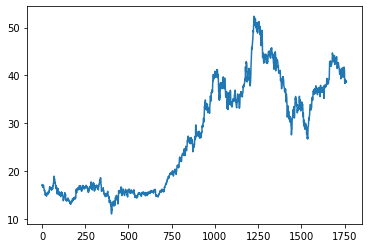

In [4]:
plt.plot(yahoo_stk_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stk_prices = scaler.fit_transform(yahoo_stk_prices)

In [5]:
train_size = int(len(yahoo_stk_prices) * 0.80)
test_size = len(yahoo_stk_prices) - train_size
train, test = yahoo_stk_prices[0:train_size,:], yahoo_stk_prices[train_size:len(yahoo_stk_prices),:]
print(len(train), len(test))

1409 353


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
trainX,trainY

(array([[0.14559111],
        [0.14874032],
        [0.14728683],
        ...,
        [0.62015504],
        [0.6305717 ],
        [0.63372093]], dtype=float32),
 array([0.14874032, 0.14728683, 0.13590118, ..., 0.6305717 , 0.63372093,
        0.6145833 ], dtype=float32))

In [12]:
testX[:5], testY[:5]

(array([[0.6312985 ],
        [0.6041666 ],
        [0.5668605 ],
        [0.60174423],
        [0.60925394]], dtype=float32),
 array([0.6041666 , 0.5668605 , 0.60174423, 0.60925394, 0.6058624 ],
       dtype=float32))

In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.008408069610595703


In [23]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
11/11 [==============================] - 5s 78ms/step - loss: 0.1334 - val_loss: 0.3030
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.0736 - val_loss: 0.1486
Epoch 3/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0423 - val_loss: 0.0694
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0312 - val_loss: 0.0484
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0214 - val_loss: 0.0217
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 8/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 7.7860e-04
Epoch 9/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
11/11 [==============================] - 0s 8ms/step - loss: 0.0021 - val_loss: 3.5794e-04


[[0.62162787]]
[[1.5715897]]
[[3.9793866]]
[[9.482609]]
[[14.562901]]
[[ 36.750797]
 [ 75.965225]
 [175.35907 ]
 [402.53207 ]
 [612.2465  ]]


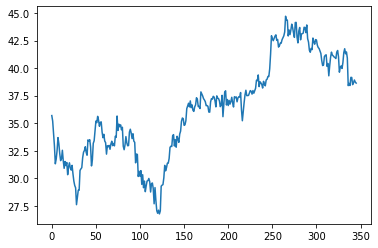

In [24]:
def plt_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict length consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plt_results_multiple(predictions, testY, predict_length)